# データセット


Python の statsmodels パッケージを使用することで、R で使われている様々なデータセットを取り出すことができる。statsmodels パッケージ中の `get_rdataset` 関数に、R で使われているときの、データセットの名前とパッケージの名前を与えると、データとそのアノテーションが取得され、オブジェクトに保存される。statsmodels パッケージで呼び出せるデータセット一覧は [GitHub](http://vincentarelbundock.github.io/Rdatasets/datasets.html) ページで公開されている。


In [0]:
import statsmodels.api as sm

In [2]:
economics_dataset = sm.datasets.get_rdataset('economics', 'ggplot2')
economics = economics_dataset.data
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


In [3]:
print(economics_dataset.data.__doc__)


    Two-dimensional size-mutable, potentially heterogeneous tabular data
    structure with labeled axes (rows and columns). Arithmetic operations
    align on both row and column labels. Can be thought of as a dict-like
    container for Series objects. The primary pandas data structure.

    Parameters
    ----------
    data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
        Dict can contain Series, arrays, constants, or list-like objects

        .. versionchanged :: 0.23.0
           If data is a dict, argument order is maintained for Python 3.6
           and later.

    index : Index or array-like
        Index to use for resulting frame. Will default to RangeIndex if
        no indexing information part of input data and no index provided
    columns : Index or array-like
        Column labels to use for resulting frame. Will default to
        RangeIndex (0, 1, 2, ..., n) if no column labels are provided
    dtype : dtype, default None
        Data ty

In [4]:
rice_dataset = sm.datasets.get_rdataset('rice', 'DAAG')
rice = rice_dataset.data
rice.head()

,PlantNo,Block,RootDryMass,ShootDryMass,trt,fert,variety
0,1,1,56,132,F10,F10,wt
1,2,1,66,120,F10,F10,wt
2,3,1,40,108,F10,F10,wt
3,4,1,43,134,F10,F10,wt
4,5,1,55,119,F10,F10,wt


In [5]:
msleep_dataset = sm.datasets.get_rdataset('msleep', 'ggplot2')
msleep = msleep_dataset.data
msleep.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


In [6]:
soils_dataset = sm.datasets.get_rdataset('Soils', 'carData')
soils = soils_dataset.data
soils.head()

,Group,Contour,Depth,Gp,Block,pH,N,Dens,P,Ca,Mg,K,Na,Conduc
0,1,Top,0-10,T0,1,5.40,0.188,0.92,215,16.35,7.65,0.72,1.14,1.09
1,1,Top,0-10,T0,2,5.65,0.165,1.04,208,12.25,5.15,0.71,0.94,1.35
2,1,Top,0-10,T0,3,5.14,0.260,0.95,300,13.02,5.68,0.68,0.60,1.41
3,1,Top,0-10,T0,4,5.14,0.169,1.10,248,11.92,7.88,1.09,1.01,1.64
4,2,Top,10-30,T1,1,5.14,0.164,1.12,174,14.17,8.12,0.70,2.17,1.85


In [7]:
iris_dataset = sm.datasets.get_rdataset('iris', 'datasets')
iris = iris_dataset.data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
orange_dataset = sm.datasets.get_rdataset('Orange', 'datasets')
orange = orange_dataset.data
orange.head()

,Tree,age,circumference
0,1,118,30
1,1,484,58
2,1,664,87
3,1,1004,115
4,1,1231,120


# Pandas 視覚化

以下で Pandas の機能を紹介するために、あらかじめ関連するいくつかのパッケージを呼び出して、使えるように準備する。

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Python でグラフを描くときは、matplotlib と seaborn パッケージがよく使われる。これらのパッケージを使うと、複雑なグラフが描けたり、細かい調整ができる。しかし、その反面、操作方法がやや難しい。matplotilb と seaborn のほかに、Pandas パッケージでも簡単な視覚化機能が備えられている。細かい調整ができないものの、Series あるいは DataFrame 型のオブジェクトに `plot` や `hist` などのメソッドをつけるだけで、グラフが描かれるようになる。データ解析時に、ちょっとデータの分布を確認したいといったときに、非常に便利である。

次のセル内のコードは基本的に実行しなくてもグラフを描くことができる。これらのコードを実行することで、グラフがきれいになる。

In [0]:
sns.set()
sns.set_style("whitegrid")
sns.set_palette('Set1')

## 散布図

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


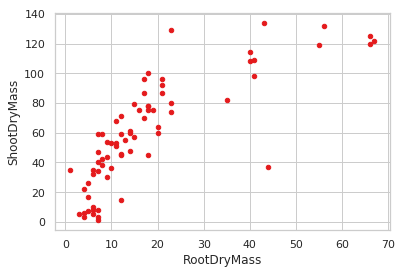

In [11]:
fig, ax = plt.subplots()
rice.plot.scatter(x='RootDryMass', y='ShootDryMass', ax=ax)
fig.show()

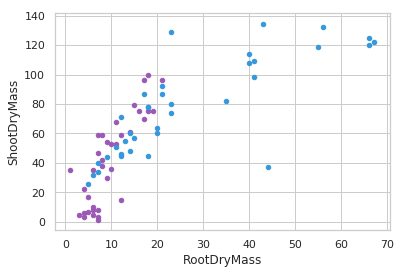

In [12]:
cols = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

fig, ax = plt.subplots()

i = 0
for group_name, group_subset  in rice.groupby('variety'):
  ax = group_subset.plot.scatter(x='RootDryMass', y='ShootDryMass', ax=ax, color=cols[i])
  i += 1
  
fig.show()

## 棒グラフ


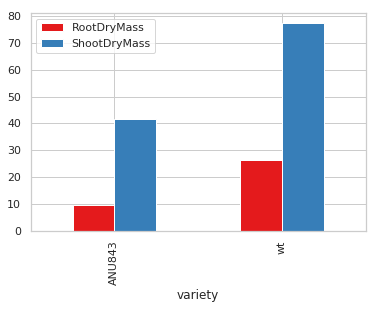

In [13]:
rice_ave = (
    rice.loc[:, ['variety', 'RootDryMass', 'ShootDryMass']]
        .groupby('variety')
        .mean()
)

fig, ax = plt.subplots()
rice_ave.plot.bar(ax=ax)
fig.show()

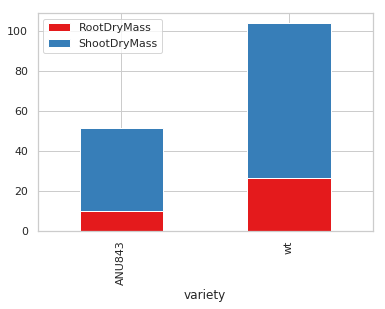

In [14]:
fig, ax = plt.subplots()
rice_ave.plot.bar(stacked=True, ax=ax)
fig.show()

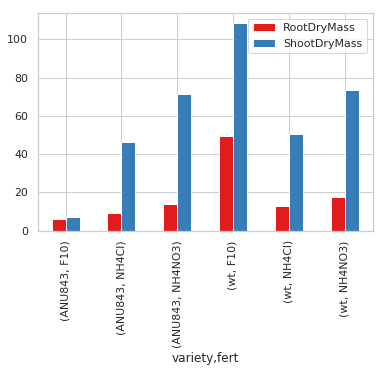

In [15]:
rice_ave = (
    rice.loc[:, ['variety', 'fert', 'RootDryMass', 'ShootDryMass']]
        .groupby(['variety', 'fert'])
        .mean()
)

fig, ax = plt.subplots()
rice_ave.plot.bar(ax=ax)
fig.show()

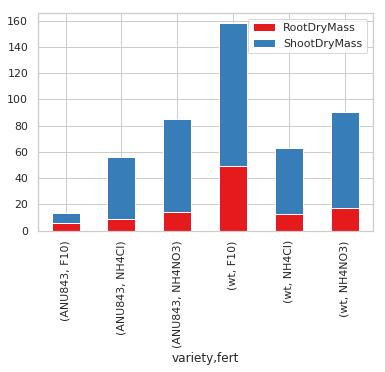

In [16]:
fig, ax = plt.subplots()
rice_ave.plot.bar(stacked=True, ax=ax)
fig.show()

## ボックスプロット

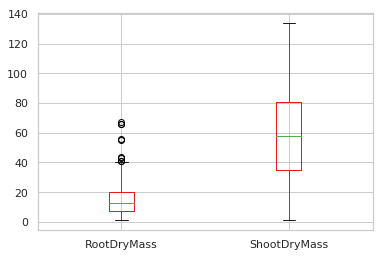

In [17]:
fig, ax = plt.subplots()
rice.plot.box(y = ['RootDryMass', 'ShootDryMass'], ax=ax)
fig.show()

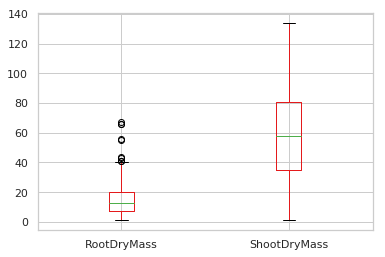

In [18]:
fig, ax = plt.subplots()
rice.loc[:, ['RootDryMass', 'ShootDryMass']].boxplot(ax=ax)
fig.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


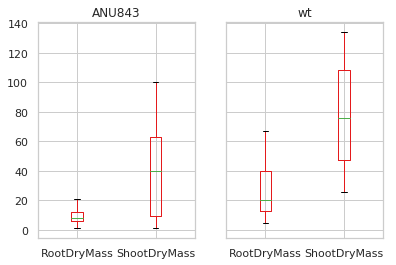

In [19]:
fig, ax = plt.subplots()
rice.loc[:, ['variety', 'RootDryMass', 'ShootDryMass']].\
     groupby('variety').\
     boxplot(ax=ax)
fig.show()

## 線グラフ

線グラフは時系列を描くときに便利なので、ここでは時系列データを使ってグラフを描く。

In [20]:
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


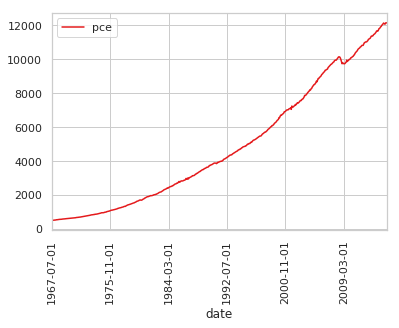

In [21]:
fig, ax = plt.subplots()
ax = economics.plot(x='date', y='pce', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.show()

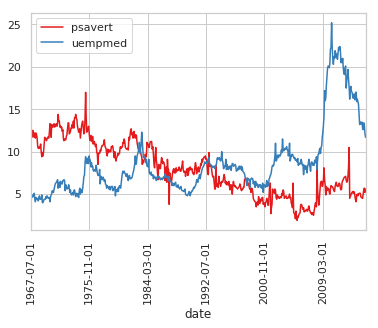

In [22]:
fig, ax = plt.subplots()
ax = economics.plot(x='date', y=['psavert', 'uempmed'], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.show()

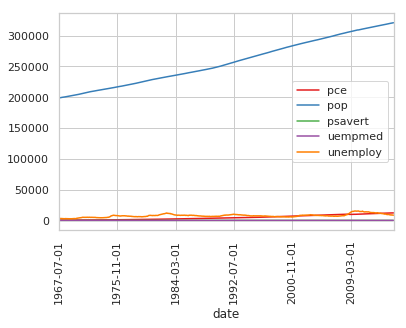

In [23]:
fig, ax = plt.subplots()
ax = economics.plot(x='date', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.show()

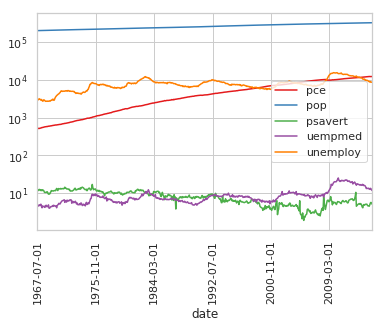

In [24]:
fig, ax = plt.subplots()
ax = economics.plot(x='date', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yscale('log')
fig.show()

## ヒストグラム

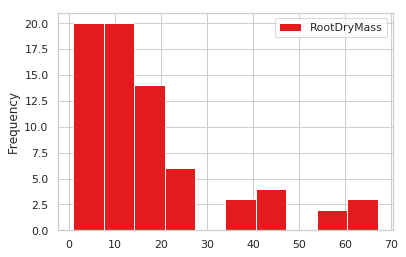

In [25]:
fig, ax = plt.subplots()
rice.plot.hist(y = 'RootDryMass',  ax=ax)
fig.show()

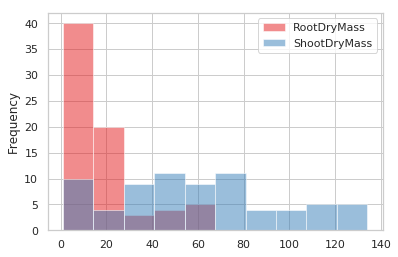

In [26]:
fig, ax = plt.subplots()
## rice.plot.hist(y = ['RootDryMass', 'ShootDryMass'], stacked=False)
rice.plot.hist(y = ['RootDryMass', 'ShootDryMass'], alpha = 0.5, ax=ax)
fig.show()

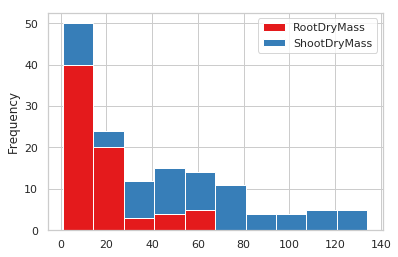

In [27]:
fig, ax = plt.subplots()
rice.plot.hist(y = ['RootDryMass', 'ShootDryMass'], stacked=True, ax=ax)
fig.show()

## ペアプロット

In [28]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


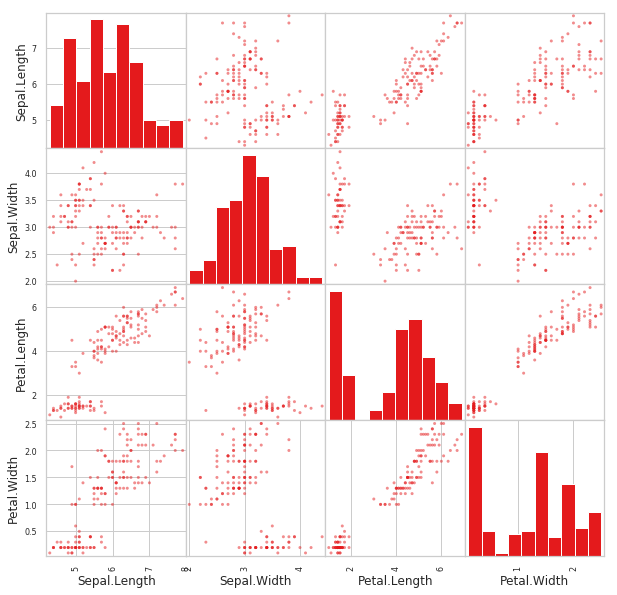

In [29]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
fig, ax = plt.subplots()
pd.plotting.scatter_matrix(iris, ax=ax)
fig.show()

# 表データハイライト

DataFrame メソッドを使用すると、データフレームのデータを画面上に表示させる時に、ハイライトさせることができる。ハイライトを行うために、`style.apply` と `style.applymap` の 2 つのメソッドが用意されている。`style.apply` は各列または各行に対してハイライト処理を行うメソッドである。例えば、各列の最大値を赤くするなどがこれにあたる。これに対して、`style.applymap` はデータフレーム全体に対するハイライト処理であり、例えばデータフレーム中のマイナス値を赤くするなどがこれにあたる。

In [30]:
np.random.seed(2019)

df = pd.DataFrame(np.random.randn(4, 6))
df.columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6']
df.index = ['A',  'B', 'C', 'D']
df

,F1,F2,F3,F4,F5,F6
A,-0.217679,0.821455,1.481278,1.331864,-0.361865,0.685609
B,0.573761,0.287728,-0.235634,0.953490,-1.689625,-0.344943
C,0.016905,-0.514984,0.244509,-0.189313,2.672172,0.464802
D,0.845930,-0.503542,-0.963336,0.064969,-3.205040,1.054969


In [31]:
def highlight_max(val):
  val_max = val.max()
  
  highlight_tags = []
  
  for v in val:
    if v == val_max:
      highlight_tags.append('background-color: orange')
    else:
      highlight_tags.append('')
  
  return highlight_tags
  

df.style.apply(highlight_max)

,F1,F2,F3,F4,F5,F6
A,-0.217679,0.821455,1.48128,1.33186,-0.361865,0.685609
B,0.573761,0.287728,-0.235634,0.95349,-1.68963,-0.344943
C,0.0169049,-0.514984,0.244509,-0.189313,2.67217,0.464802
D,0.84593,-0.503542,-0.963336,0.0649686,-3.20504,1.05497


In [32]:
def highlight_max(val):
  val_max = val.max()
  
  highlight_tags = []
  
  for v in val:
    if v == val_max:
      highlight_tags.append('background-color: orange')
    else:
      highlight_tags.append('')
  
  return highlight_tags
  

df.style.apply(highlight_max, axis=1)

,F1,F2,F3,F4,F5,F6
A,-0.217679,0.821455,1.48128,1.33186,-0.361865,0.685609
B,0.573761,0.287728,-0.235634,0.95349,-1.68963,-0.344943
C,0.0169049,-0.514984,0.244509,-0.189313,2.67217,0.464802
D,0.84593,-0.503542,-0.963336,0.0649686,-3.20504,1.05497


In [33]:
def highlight_negatives(val):
  
  highlight_tags = ''
  
  if val < 0:
    highlight_tags = 'color: #ff0000;'  
  
  return highlight_tags
  

df.style.applymap(highlight_negatives)

,F1,F2,F3,F4,F5,F6
A,-0.217679,0.821455,1.48128,1.33186,-0.361865,0.685609
B,0.573761,0.287728,-0.235634,0.95349,-1.68963,-0.344943
C,0.0169049,-0.514984,0.244509,-0.189313,2.67217,0.464802
D,0.84593,-0.503542,-0.963336,0.0649686,-3.20504,1.05497


In [34]:
df.style.apply(highlight_max).applymap(highlight_negatives)

,F1,F2,F3,F4,F5,F6
A,-0.217679,0.821455,1.48128,1.33186,-0.361865,0.685609
B,0.573761,0.287728,-0.235634,0.95349,-1.68963,-0.344943
C,0.0169049,-0.514984,0.244509,-0.189313,2.67217,0.464802
D,0.84593,-0.503542,-0.963336,0.0649686,-3.20504,1.05497


In [35]:
df.style.apply(highlight_max, subset=['F1', 'F2', 'F3']).\
         applymap(highlight_negatives, subset=['F4', 'F5', 'F6'])

,F1,F2,F3,F4,F5,F6
A,-0.217679,0.821455,1.48128,1.33186,-0.361865,0.685609
B,0.573761,0.287728,-0.235634,0.95349,-1.68963,-0.344943
C,0.0169049,-0.514984,0.244509,-0.189313,2.67217,0.464802
D,0.84593,-0.503542,-0.963336,0.0649686,-3.20504,1.05497


In [36]:
df.style.applymap(highlight_negatives, subset=pd.IndexSlice[['A', 'C'], ['F1', 'F3', 'F5']])

,F1,F2,F3,F4,F5,F6
A,-0.217679,0.821455,1.48128,1.33186,-0.361865,0.685609
B,0.573761,0.287728,-0.235634,0.95349,-1.68963,-0.344943
C,0.0169049,-0.514984,0.244509,-0.189313,2.67217,0.464802
D,0.84593,-0.503542,-0.963336,0.0649686,-3.20504,1.05497


画面上に表示されるデータの桁数は `style.format` メソッドで調整できる。

In [37]:
df.style.format('{:.2f}')

,F1,F2,F3,F4,F5,F6
A,-0.22,0.82,1.48,1.33,-0.36,0.69
B,0.57,0.29,-0.24,0.95,-1.69,-0.34
C,0.02,-0.51,0.24,-0.19,2.67,0.46
D,0.85,-0.50,-0.96,0.06,-3.21,1.05


In [38]:
df.style.format('{:.2f}').format({'F1': '{:.5f}'})

,F1,F2,F3,F4,F5,F6
A,-0.21768,0.82,1.48,1.33,-0.36,0.69
B,0.57376,0.29,-0.24,0.95,-1.69,-0.34
C,0.01690,-0.51,0.24,-0.19,2.67,0.46
D,0.84593,-0.50,-0.96,0.06,-3.21,1.05


In [39]:
df.iloc[0, 5] = np.nan
df.iloc[2, 2] = np.nan
df.style.highlight_null(null_color='darkgray')

,F1,F2,F3,F4,F5,F6
A,-0.217679,0.821455,1.48128,1.33186,-0.361865,nan
B,0.573761,0.287728,-0.235634,0.95349,-1.68963,-0.344943
C,0.0169049,-0.514984,nan,-0.189313,2.67217,0.464802
D,0.84593,-0.503542,-0.963336,0.0649686,-3.20504,1.05497


In [40]:
#import seaborn as sns
df.style.background_gradient(cmap='Blues').\
         highlight_null(null_color='darkgray')

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,F1,F2,F3,F4,F5,F6
A,-0.217679,0.821455,1.48128,1.33186,-0.361865,nan
B,0.573761,0.287728,-0.235634,0.95349,-1.68963,-0.344943
C,0.0169049,-0.514984,nan,-0.189313,2.67217,0.464802
D,0.84593,-0.503542,-0.963336,0.0649686,-3.20504,1.05497


In [41]:
df.style.bar(color=['lightseagreen', 'sandybrown'], align='mid').highlight_null(null_color='darkgray')

,F1,F2,F3,F4,F5,F6
A,-0.217679,0.821455,1.48128,1.33186,-0.361865,nan
B,0.573761,0.287728,-0.235634,0.95349,-1.68963,-0.344943
C,0.0169049,-0.514984,nan,-0.189313,2.67217,0.464802
D,0.84593,-0.503542,-0.963336,0.0649686,-3.20504,1.05497


フレームワークを調整した後に、`to_excel` メソッドを使用して Excel の形式で保存することもできる。

In [42]:
import openpyxl

df.style.background_gradient(cmap='Blues').\
         highlight_null(null_color='#cccccc').\
         to_excel('output.xlsx')

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


# References



*   [pandas: powerful Python data analysis toolkit](https://pandas.pydata.org/pandas-docs/stable/index.html)
*   [Pythonによるデータ分析入門 第2版 ―NumPy、pandasを使ったデータ処理](https://github.com/Jffrank/Books)



# 視覚化

## ヒートマップ

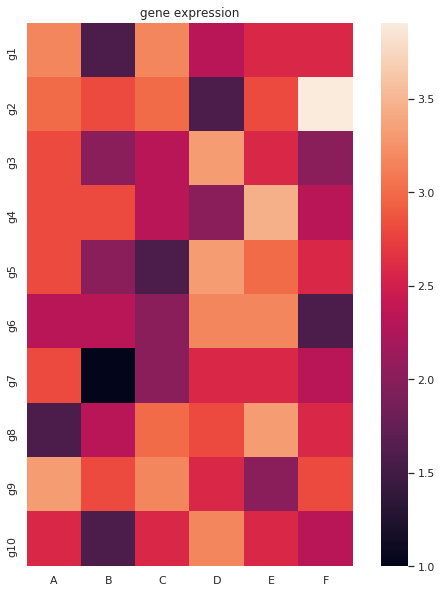

In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

np.random.seed(2018)

data = np.random.binomial(100, 0.05, 60).reshape((10, 6))
data = np.log2(data + 1)

xlabels = ['g' + str(i + 1) for i in range(10)]
ylabels = ['A', 'B', 'C', 'D', 'E', 'F']

df = pd.DataFrame(data, index=xlabels, columns=ylabels)

sns.heatmap(df, square=True)

plt.title('gene expression')
plt.show()

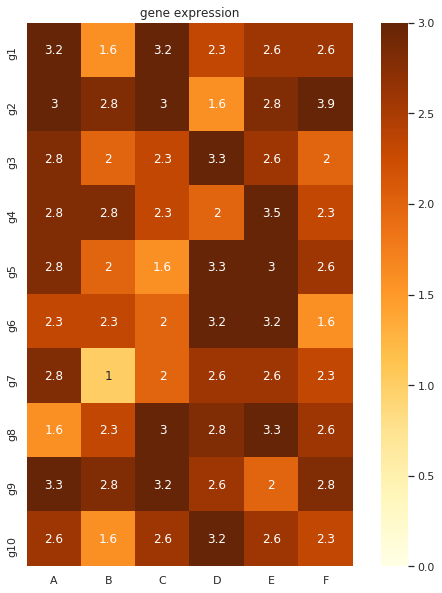

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set() 
np.random.seed(2018) 

data = np.random.binomial(100, 0.05, 60).reshape((10, 6))
data = np.log2(data + 1)

xlabels = ['g' + str(i + 1) for i in range(10)]
ylabels = ['A', 'B', 'C', 'D', 'E', 'F']

df = pd.DataFrame(data, index=xlabels, columns=ylabels) 

sns.heatmap(df, annot=True, square=True, cmap='YlOrBr', vmin=0, vmax=3)

plt. title('gene expression') 
plt.show()

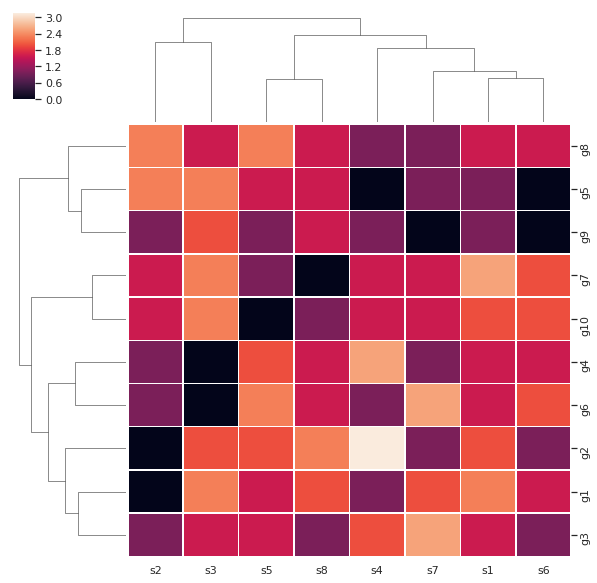

In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() 
np.random.seed(2018) 

data = np.random.binomial(100, 0.02, 80).reshape((10, 8)) 
data = np.log2(data + 1) 

xlabels = ['g' + str(i + 1) for i in range(10)] 
ylabels = ['s' + str(i + 1) for i in range(8)] 

df = pd.DataFrame(data, index=xlabels, columns=ylabels) 

sns_plot = sns.clustermap(df, method='ward', metric='euclidean', linewidths=0.5)

#plt.setp(sns_plot.ax_heatmap.get_yticklabels(), rotation=0) 
#plt.setp(sns_plot.ax_heatmap.get_xticklabels(), rotation=30) 

plt.show()

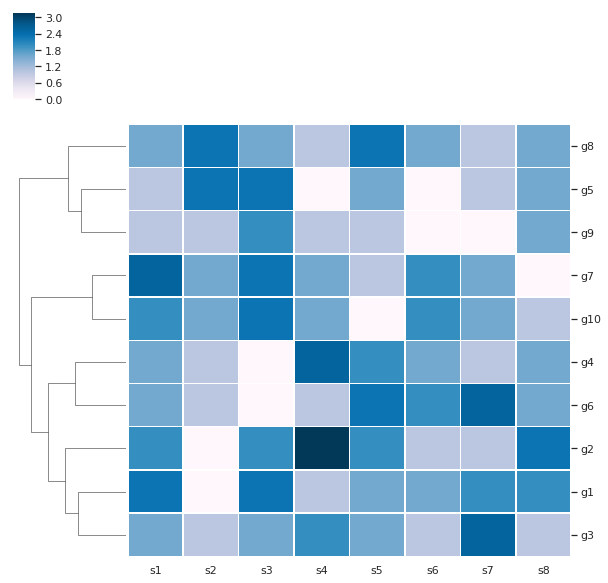

In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() 
np.random.seed(2018) 

data = np.random.binomial(100, 0.02, 80).reshape((10, 8)) 
data = np.log2(data + 1) 

xlabels = ['g' + str(i + 1) for i in range(10)] 
ylabels = ['s' + str(i + 1) for i in range(8)] 

df = pd.DataFrame(data, index=xlabels, columns=ylabels) 

sns_plot = sns.clustermap(df, method='ward', metric='euclidean', col_cluster = False, cmap='PuBu', linewidths=0.5)

plt.setp(sns_plot.ax_heatmap.get_yticklabels(), rotation=0) 
plt.setp(sns_plot.ax_heatmap.get_xticklabels(), rotation=0) 

plt.show()

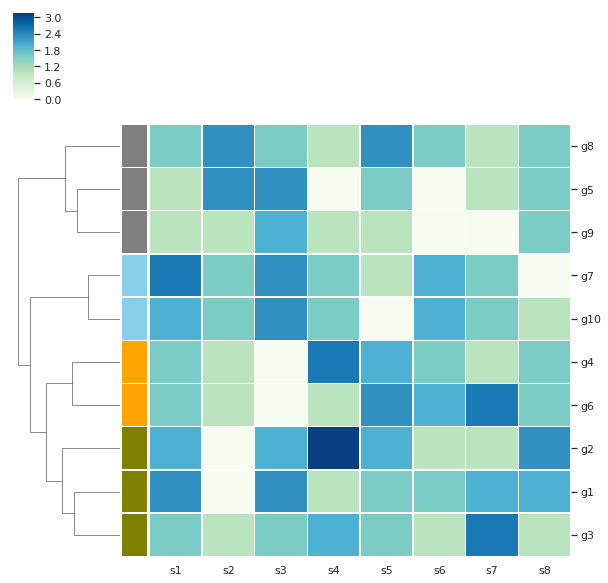

In [47]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

np.random.seed(2018) 
sns.set()

data = np.random.binomial(100, 0.02, 80).reshape((10, 8)) 
data = np.log2(data + 1) 

xlabels = ['g' + str(i + 1) for i in range(10)] 
ylabels = ['s' + str(i + 1) for i in range(8)] 

df = pd.DataFrame(data, index=xlabels, columns=ylabels) 

gene_loc = ['olive', 'olive', 'olive', 'orange', 'gray', 'orange', 'skyblue', 'gray', 'gray', 'skyblue']

sns_plot = sns.clustermap(df, method='ward', metric='euclidean', col_cluster = False, cmap='GnBu', linewidths=0.5, row_colors = gene_loc) 

plt.setp(sns_plot.ax_heatmap.get_yticklabels(), rotation=0) 
plt.setp(sns_plot.ax_heatmap.get_xticklabels(), rotation=0) 

plt.show()